
# OKCupid Exploratory Data Analysis



 **Marketing Standardization Analysis**

**Objective**


*   Identify market segments according to age, sex, and income
  *   Descriptive statistics: median user characteristics
*   Describe features of largest segment of median user characteristics

**Key Takeaways**


*   Men outnumber women 3:2 on OkCupid

*   The median user is a 32 years old 5'7" straight white educated male living in San Francisco that makes $60,000 a year, drinks socially, and loves dogs.


*   The average man makes 15-25K more then women

**Sections**


1.  Who are OkCupid customers?

2.  Potential for pet food Advertisements? 

3.   Random Comparison
  *   Height vs. Income (Inconclusive)

















**Data Cleaning**




In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
  
  
df_okc = pd.read_csv("https://raw.githubusercontent.com/MissionU/python_public/master/profiles_no_essay.csv")



df_okc.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
59940,59,NaN,NaN,socially,never,graduated from college/university,NaN,62,-1,sales / marketing / biz dev,...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59941,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72,-1,entertainment / media,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59942,42,average,mostly anything,not at all,never,graduated from masters program,asian,71,100000,construction / craftsmanship,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59943,27,athletic,mostly anything,socially,often,working on college/university,"asian, black",73,-1,medicine / health,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single
59944,39,average,NaN,socially,NaN,graduated from masters program,white,68,-1,medicine / health,...,"san francisco, california",NaN,gay,likes dogs and likes cats,catholicism and laughing about it,m,gemini and it&rsquo;s fun to think about,sometimes,english,single


In [31]:
# Converting data types to correct format

# for column in df_okc:
#   if columnname = column name:
#     .astype('category')
df_okc['sex'] = df_okc['sex'].astype('category')
df_okc['diet'] = df_okc['diet'].astype('category')
df_okc['education'] = df_okc['education'].astype('category')
df_okc['job'] = df_okc['job'].astype('category')
df_okc['offspring'] = df_okc['offspring'].astype('category')
df_okc['orientation'] = df_okc['orientation'].astype('category')
df_okc['religion'] = df_okc['religion'].astype('category')
df_okc['ethnicity'] = df_okc['ethnicity'].astype('category')
df_okc['smokes'] = df_okc['smokes'].astype('category')
df_okc['speaks'] = df_okc['speaks'].astype('category')
df_okc['status'] = df_okc['status'].astype('category')
df_okc['pets'] = df_okc['pets'].astype('category')
df_okc['drinks'] = df_okc['drinks'].astype('category')
df_okc['body_type'] = df_okc['body_type'].astype('category')
df_okc['drugs'] = df_okc['drugs'].astype('category')
df_okc['age'] = pd.to_numeric(df_okc['age'], errors='coerce')
df_okc['height'] = pd.to_numeric(df_okc['height'], errors='coerce')
df_okc['income'] = pd.to_numeric(df_okc['income'], errors='coerce')
df_okc['last_online'] = pd.to_datetime(df_okc['last_online'], errors='coerce')
df_okc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59945 entries, 0 to 59944
Data columns (total 21 columns):
age            59944 non-null float64
body_type      54649 non-null category
diet           35551 non-null category
drinks         56960 non-null category
drugs          45866 non-null category
education      53317 non-null category
ethnicity      54264 non-null category
height         59940 non-null float64
income         59943 non-null float64
job            51746 non-null category
last_online    59943 non-null datetime64[ns]
location       59943 non-null object
offspring      24383 non-null category
orientation    59943 non-null category
pets           40023 non-null category
religion       39717 non-null category
sex            59943 non-null category
sign           48887 non-null object
smokes         54431 non-null category
speaks         59893 non-null category
status         59943 non-null category
dtypes: category(15), datetime64[ns](1), float64(3), object(2)
memory usa

In [32]:
# EXAMINE AMOUNT OF MISSING DATA ON KEY VARIABLES OF INTEREST:
# age, sex, height, income

# compute univariate descriptive statistics to see if there are
# any outliers

# Outliers 
# Income = -1 really means NAN    ##Drop in smaller subset##
# Income set < 300,000   very few people make that much
# Age set < 100   2 people over the age of 100 
# Height set > 2'11" 
df_okc.describe()

,age,height,income
count,59944.000000,59940.000000,59943.000000
mean,32.339684,68.295229,20033.557880
std,9.451984,3.994891,97348.525138
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [33]:
# Created subset of age, sex, height, and income data, then dropped the 4 columns with nulls

subset = df_okc[['age', 'sex', 'height', 'income']].dropna()

subset.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 59940 entries, 0 to 59944
Data columns (total 4 columns):
age       59940 non-null float64
sex       59940 non-null category
height    59940 non-null float64
income    59940 non-null float64
dtypes: category(1), float64(3)
memory usage: 1.9 MB


In [41]:
# Income analysis not including people who didn't enter income "-1" and people who entered over $300000
subinc = df_okc[['age', 'sex', 'height', 'income']].dropna()
subinc = subinc[subinc['income'] > -1]
subinc = subinc[subinc['income'] < 300000]
subinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10934 entries, 1 to 59942
Data columns (total 4 columns):
age       10934 non-null float64
sex       10934 non-null category
height    10934 non-null float64
income    10934 non-null float64
dtypes: category(1), float64(3)
memory usage: 352.5 KB


# Who are OkCupid customers?

**Age**
*   The mean age is 32

**Sex**
*   60% of users are men

**Income**
*   Of the 10,982 users who remained after removing outliers and missing values, most users were male (73%). On average, users were 30 years old (median; mean age = 32.63 years old, SD = 9.83 years). 

  * Women median = 40K

  *  Men median = 60K

*   On average, men make more income than women across all ages

**Sexual Orientation**
*   86% of users are straight

**Ethnicity**

*   54% of users are listed as white, followed by 10% Asian 

**Location**

*   51% of OkCupid's California customers are located in San Francisco

**Drinking**


*   78% drink socially

**Education**


*   50% of users have achieved bachelors degrees
*   Followed by 22% with masters degrees

**Religion**

** Bias not clean data although interesting * *


*   Non-Religious = 41%
*   Somewhat Religious = 38%
*   Very Religious = 19%
*   
*   List item
















# **Age**

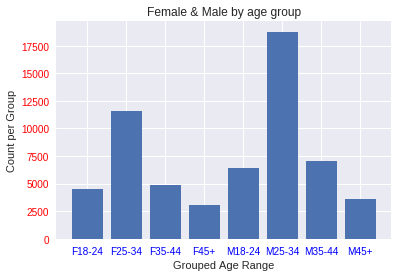

In [34]:
# The majority of our users are 25-34


A18_24 = df_okc[ (df_okc['age'] >= 18) & (df_okc['age'] <= 24)]
A25_34 = df_okc[ (df_okc['age'] >= 25) & (df_okc['age'] <= 34)]
A35_44 = df_okc[ (df_okc['age'] >= 35) & (df_okc['age'] <= 44)]
A45 = df_okc[df_okc['age'] >= 45]

segments = [len(A18_24[A18_24["sex"] == "f"]), len(A25_34[A25_34["sex"] == "f"]), len(A35_44[A35_44["sex"] == "f"]), len(A45[A45["sex"] == "f"]), len(A18_24[A18_24["sex"] == "m"]), len(A25_34[A25_34["sex"] == "m"]), len(A35_44[A35_44["sex"] == "m"]), len(A45[A45["sex"] == "m"])]
titles = ["F18-24", "F25-34", "F35-44", "F45+", "M18-24", "M25-34", "M35-44", "M45+"]
plt.bar(titles, segments)
plt.title("Female & Male by age group")

plt.ylabel('Count per Group')
plt.xlabel('Grouped Age Range')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = 'rrrrbbbb'  


plt.show()


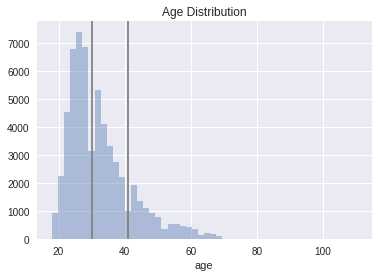

In [35]:
### Interesting divots around 30 & 40 which I hypothesize is due to people lying about their age.

age = sns.distplot(subset['age'], kde=False)

plt.title("Age Distribution")
age.axvline(30, color='gray')
age.axvline(41, color='gray')

# **Sex**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Count Sex')

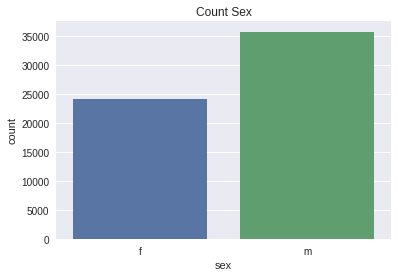

In [36]:
# Most users are men


sns.countplot(subset['sex'])
plt.title("Count Sex")

In [42]:
# Percentage of each sex on OkCupid
subset['sex'].value_counts(normalize=True)

m    0.597664
f    0.402336
Name: sex, dtype: float64

# **Income**

In [43]:
# Percentage of each sex in OkCupids user base that has input income 
subinc['sex'].value_counts(normalize=True)

m    0.726998
f    0.273002
Name: sex, dtype: float64

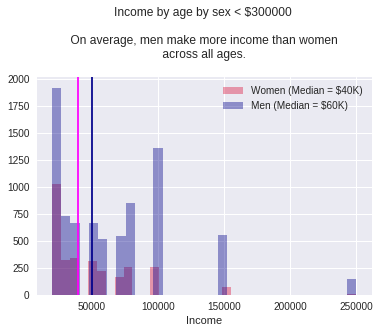

In [133]:
# sns.distplot(subinc1['income'], kde=False)
income = sns.distplot(subinc.income[subinc['sex'] == 'f'], kde=False, color='crimson', label='Women (Median = $40K)')
income = sns.distplot(subinc.income[subinc['sex'] == 'm'], kde=False, color='darkblue', label='Men (Median = $60K)')
plt.xlabel('Income');

income.axvline(np.median(subinc.income[df_okc.sex=='m']), color = "darkblue")
income.axvline(np.median(subinc.income[df_okc.sex=='f']), color = "magenta")

plt.title('Income by age by sex < $300000 \n\n \
On average, men make more income than women \n across all ages. \n') 

plt.legend()
plt.show()

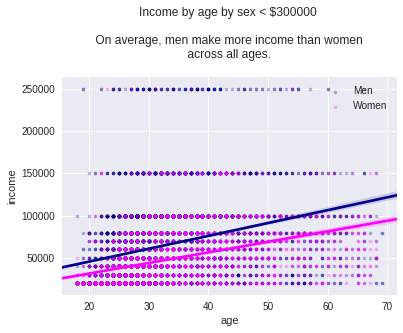

In [144]:
sns.regplot(x='age', y='income', data=subinc[subinc['sex'] == 'm'], color='darkblue', marker='.', label='Men', scatter_kws={'alpha':0.3})
sns.regplot(x='age', y='income', data=subinc[subinc['sex'] == 'f'], color='magenta', marker='.', label='Women', scatter_kws={'alpha':0.3})

plt.title('Income by age by sex < $300000 \n\n \
On average, men make more income than women \n across all ages. \n') 

plt.legend() 

plt.show()

# **Orientation**

In [44]:
# Percentage of straight users

df_okc["orientation"].value_counts(normalize =True)

straight    0.860868
gay         0.092972
bisexual    0.046161
Name: orientation, dtype: float64

Text(0.5,1,'\n Sexual Orientation \n\n 86% of users are Straight \n')

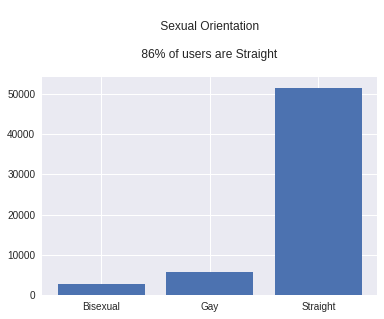

In [26]:
# 86% of users are straight

segments = [len(df_okc[df_okc["orientation"] == "straight"]), len(df_okc[df_okc["orientation"] == "bisexual"]), len(df_okc[df_okc["orientation"] == "gay"])]
# segments[0].set_color='r'
titles = ["Straight", "Bisexual", "Gay"]
plt.bar(titles, segments)


plt.title("\n Sexual Orientation \n\n 86% of users are Straight \n")

# **Ethnicity**

In [58]:
# drop missing values from ethnicity
race = df_okc[["ethnicity"]].dropna()

In [60]:
# Percentage of top ethnic groups that use OKCupid

race["ethnicity"].value_counts().head()/len(race["ethnicity"])

white               0.604968
asian               0.113040
hispanic / latin    0.052023
black               0.037004
other               0.031439
Name: ethnicity, dtype: float64

# **Location**

In [159]:
# Percentage of top 5 locations users are located

df_okc["location"].value_counts().head()/len(df_okc["location"])

san francisco, california    0.518208
oakland, california          0.120344
berkeley, california         0.070231
san mateo, california        0.022204
palo alto, california        0.017750
Name: location, dtype: float64

# **Drinkers**

In [12]:
# Percentage of users that drink  1 = Social Drinker:  0 = Not a Drinker:  2 = Heavy Drinker:
df_okc["drinks"].value_counts()

drinks = df_okc['drinks'].map({"socially": 1,
                               "rarely": 0,
                               "often": 1,
                               "not at all": 0,
                               "very often": 2,
                               "desperately": 2})
drinks.value_counts()/len(drinks)

1.0    0.783101
0.0    0.153858
2.0    0.013229
Name: drinks, dtype: float64

# **Level of Education**

In [61]:
df_okc["education"].value_counts()

graduated from college/university                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            23958
graduated from masters program                                                                                                                                                                                                                                                                                       

In [67]:
education = df_okc["education"].map({"graduated from college/university": 4,
                                    "graduated from masters program": 6,
                                    "working on college/university": 2,
                                    "working on masters program": 4,
                                    "graduated from two-year college": 2,
                                    "graduated from high school": 0,
                                    "graduated from ph.d program": 8,
                                    "graduated from law school": 6,
                                    "working on two-year college": 0,
                                    "dropped out of college/university": 0,
                                    "working on ph.d program": 6,
                                    "college/university": 4,
                                    "graduated from space camp": 0,
                                    "dropped out of space camp": 0,
                                    "graduated from med school": 6,
                                    "working on space camp": 0,
                                    "working on law school": 4,
                                    "two-year college": 2,
                                    "working on med school": 2,
                                    "dropped out of two-year college": 0,
                                    "dropped out of masters program": 4,
                                    "masters program": 6,
                                    "dropped out of ph.d program": 6,
                                    "dropped out of high school": 0,
                                    "high school": 0,
                                    "working on high school": 0,
                                    "space camp": 0,
                                    "ph.d program": 8,
                                    "law school": 6,
                                    "dropped out of law school": 4,
                                    "dropped out of med school": 4,
                                    "med school": 6,}).dropna()


# Education degrees achieved 
education.value_counts(normalize=True)

4.0    0.504183
6.0    0.221416
2.0    0.143991
0.0    0.106084
8.0    0.024327
Name: education, dtype: float64

In [68]:
education.describe()

count    53316.000000
mean         3.827819
std          1.875799
min          0.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: education, dtype: float64

# **Religion**

In [90]:
# Group by Religion
# 0 = Non religious or "laughing about it"
# 1 = somewhat religious or not to serious
# 2 = very religious

# Exception is agnostic gets a down vote because it is not an organized religion
# Atheism is always 0
# Other = 1 unless not serious
df_okc["religious"] = df_okc["religion"].map({"agnosticism": 1,
                                              "other": 1,
                                              "agnosticism but not too serious about it": 0,
                                              "agnosticism and laughing about it": 0,
                                              "catholicism but not too serious about it": 1,
                                              "atheism": 0,
                                              "other and laughing about it": 0,
                                              "atheism and laughing about it": 0,
                                              "christianity": 2,
                                              "christianity but not too serious about it": 1,
                                              "other but not too serious about it": 1,
                                              "judaism but not too serious about it": 1,
                                              "atheism but not too serious about it": 0,
                                              "catholicism": 2,
                                              "christianity and somewhat serious about it": 2,
                                              "atheism and somewhat serious about it": 0,
                                              "other and somewhat serious about it": 1,
                                              "catholicism and laughing about it": 0,
                                              "judaism and laughing about it": 0,
                                              "buddhism but not too serious about it": 1,
                                              "agnosticism and somewhat serious about it": 1,
                                              "judaism": 2,
                                              "christianity and very serious about it": 2,
                                              "atheism and very serious about it": 0,
                                              "catholicism and somewhat serious about it": 2,
                                              "other and very serious about it": 2,
                                              "buddhism and laughing about it": 0,
                                              "buddhism": 2,
                                              "christianity and laughing about it": 0,
                                              "buddhism and somewhat serious about it": 2,
                                              "agnosticism and very serious about it": 1,
                                              "judaism and somewhat serious about it": 2,
                                              "hinduism but not too serious about it": 1,
                                              "hinduism": 2,
                                              "catholicism and very serious about it": 2,
                                              "buddhism and very serious about it": 2,
                                              "hinduism and somewhat serious about it": 2,
                                              "islam": 2,
                                              "hinduism and laughing about it": 0,
                                              "islam but not too serious about it": 1,
                                              "judaism and very serious about it": 2,
                                              "islam and somewhat serious about it": 2,
                                              "islam and laughing about it": 0,
                                              "hinduism and very serious about it": 2,
                                              "islam and very serious about it": 2,
                                             })

religious = df_okc["religious"].dropna()

religious.value_counts(normalize =True)
# 0 = Non religious 
# 1 = Somewhat
# 2 = Very



0.0    0.416446
1.0    0.389606
2.0    0.193947
Name: religious, dtype: float64

In [138]:
# Sub set Drop NA
subrel = df_okc[["income","religious","age"]].dropna()

# Remove Outliers
subrel = subrel[subrel["income"] > 1] 
subrel = subrel[subrel["income"] < 300000]

# Convert data type
subrel["religious"] = subrel["religious"].astype("category")
subrel.describe()

,income,age
count,8578.000000,8578.000000
mean,58503.147587,33.050944
std,41556.770660,10.192039
min,20000.000000,18.000000
25%,20000.000000,26.000000
50%,50000.000000,30.000000
75%,80000.000000,38.000000
max,250000.000000,69.000000


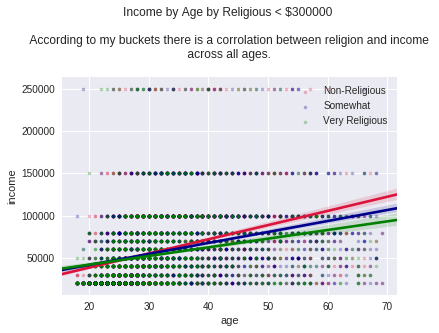

In [149]:
sns.regplot(x='age', y='income', data=subrel[subrel['religious'] == 0], color='crimson', marker='.', label='Non-Religious', scatter_kws={'alpha':0.3})
sns.regplot(x='age', y='income', data=subrel[subrel['religious'] == 1], color='darkblue', marker='.', label='Somewhat', scatter_kws={'alpha':0.3})
sns.regplot(x='age', y='income', data=subrel[subrel['religious'] == 2], color='g', marker='.', label='Very Religious', scatter_kws={'alpha':0.3})
plt.title('Income by Age by Religious < $300000 \n\n \
According to my buckets there is a corrolation between religion and income \n across all ages. \n') 

plt.legend() 

plt.show()

# Potential for pet food Advertisments? 

**Takeaways**

*   Yes, San Francisco would be an excellent market for pet advertisement on OkCupid especially for Dogs! 

  *   92% of users like or own Dogs
  *   64% of users like or own Cats



In [87]:
# 92% of users like dogs in San Francisco

(len(subpet[subpet["dogs"] == 1])+len(subpet[subpet["dogs"] == 2]))/len(subpet["dogs"])

0.921245283961722

In [75]:
# Subset for user interest in dogs

subpet = df_okc[["pets", "income", "last_online", "age"]].dropna()


subpet["dogs"] = subpet["pets"]
subpet["dogs"] = subpet["dogs"].map({'has dogs': 1, 
                                     'has dogs and likes cats': 1,
                                     'has dogs and has cats': 1, 
                                     'has dogs and dislikes cats': 1, 
                                     'likes dogs and likes cats': 2, 
                                     'likes dogs': 2, 
                                     'likes dogs and has cats': 2, 
                                     'likes dogs and dislikes cats': 2, 
                                     'has cats': 0, 
                                     'likes cats': 0, 
                                     'dislikes dogs and likes cats': 0, 
                                     'dislikes dogs and dislikes cats': 0, 
                                     'dislikes cats': 0, 
                                     'dislikes dogs and has cats': 0, 
                                     'dislikes dogs': 0})
subpet["dogs"] = pd.to_numeric(subpet["dogs"]) 
subpet["dogs"].value_counts()

2    28379
1     8492
0     3152
Name: dogs, dtype: int64

In [88]:
# 64% of users like cats in San Francisco

(len(subpet[subpet["cats"] == 1])+len(subpet[subpet["cats"] == 2]))/len(subpet["cats"])

0.6427054443694875

In [77]:
# Subset for users interest in Cats
subpet["cats"] = subpet["pets"]
subpet["cats"] = subpet["cats"].map({'has dogs': 0, 
                                     'has dogs and likes cats': 2,
                                     'has dogs and has cats': 1, 
                                     'has dogs and dislikes cats': 0, 
                                     'likes dogs and likes cats': 2, 
                                     'likes dogs': 0, 
                                     'likes dogs and has cats': 1, 
                                     'likes dogs and dislikes cats': 0, 
                                     'has cats': 1, 
                                     'likes cats': 2, 
                                     'dislikes dogs and likes cats': 2, 
                                     'dislikes dogs and dislikes cats': 0, 
                                     'dislikes cats': 0, 
                                     'dislikes dogs and has cats': 1, 
                                     'dislikes dogs': 0})
subpet["cats"] = pd.to_numeric(subpet["cats"]) 
subpet["cats"].value_counts()

2    18449
0    14300
1     7274
Name: cats, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


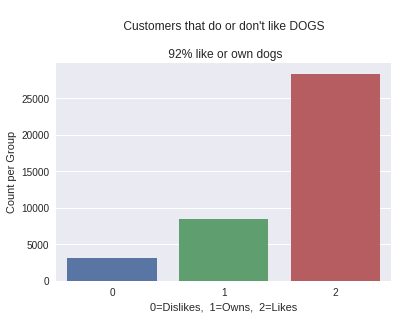

In [89]:
sns.countplot(x=subpet['dogs'])
plt.legend()
plt.title("\n Customers that do or don't like DOGS \n\n 92% like or own dogs")
plt.ylabel('Count per Group')
plt.xlabel('0=Dislikes,  1=Owns,  2=Likes')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


Text(0.5,0,'0=Dislikes, 1=Owns, 2=Likes')

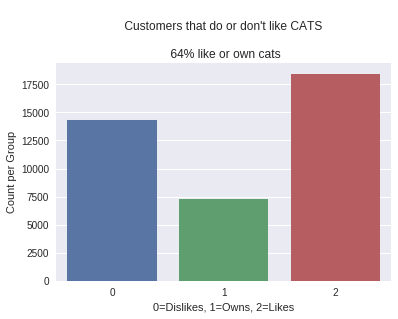

In [90]:
sns.countplot(x=subpet['cats'])
plt.legend()
plt.title("\n Customers that do or don't like CATS \n\n 64% like or own cats")
plt.ylabel('Count per Group')
plt.xlabel('0=Dislikes, 1=Owns, 2=Likes')

# Random Analysis

Out of curiosity I analyzed how height effected income and discovered no corrolation.




In [19]:
# remove outliers people over 80 and under 2'11"

subset = subset[subset['age'] < 80]
subset = subset[subset['height'] >= 36]

subset.describe()

,age,height,income
count,59931.000000,59931.000000,59931.000000
mean,32.337238,68.301830,20019.214914
std,9.442003,3.939538,97275.321411
min,18.000000,36.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,69.000000,95.000000,1000000.000000


In [16]:
subinc1 = subinc[['age', 'sex', 'height', 'income']]
subinc1 = subinc1[subinc1['income'] < 300000]

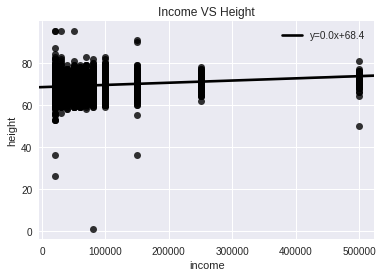

In [53]:
# After noticing a slight correlation between height and increased income I graphed by sex


slope, intercept, r_value, p_value, std_err = stats.linregress(subinc['income'],subinc['height'])

# use line_kws to set line label for legend
ax = sns.regplot(x="income", y="height", data=subinc, color='k', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
plt.title('Income VS Height')
ax.legend()

plt.show()

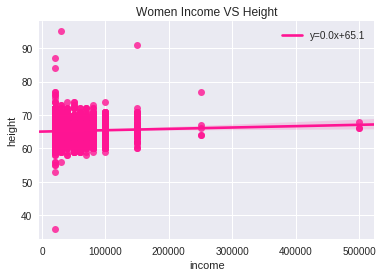

In [51]:
# Only female we see a slight increase
subincf = subinc[['age', 'sex', 'height', 'income']].dropna()
subincf = subincf[subincf['sex'] == 'f']

slope, intercept, r_value, p_value, std_err = stats.linregress(subincf['income'],subincf['height'])

# use line_kws to set line label for legend
ax = sns.regplot(x="income", y="height", data=subincf, color='deeppink', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
plt.title('Women Income VS Height')
ax.legend()

plt.show()


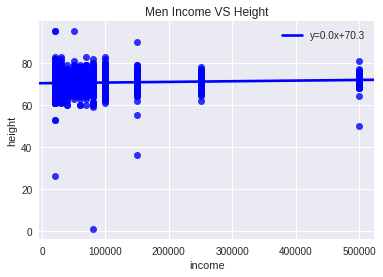

In [52]:
# only male we see a slight increase
subincm = subinc[['age', 'sex', 'height', 'income']].dropna()
subincm = subincm[subincm['sex'] == 'm']


slope, intercept, r_value, p_value, std_err = stats.linregress(subincm['income'],subincm['height'])

# use line_kws to set line label for legend
ax = sns.regplot(x="income", y="height", data=subincm, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
plt.title('Men Income VS Height')
ax.legend()

plt.show()

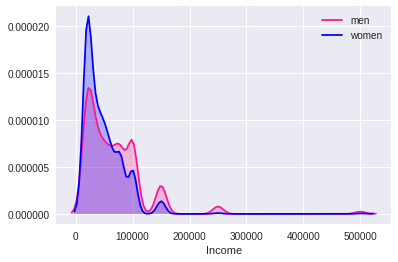

In [30]:
sns.kdeplot(subinc.income[df_okc.sex=='m'], label='men', shade=True, color='deeppink')
sns.kdeplot(subinc.income[df_okc.sex=='f'], label='women', shade=True, color='b')
plt.xlabel('Income');